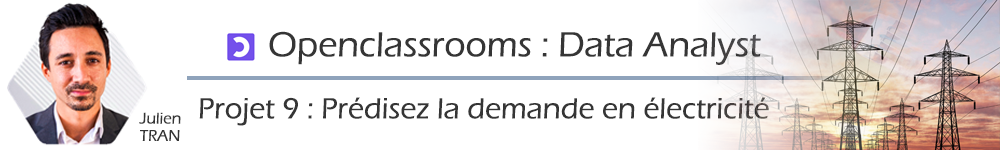

### Mission 2 : Effectuez une désaisonnalisation de la consommation que vous aurez obtenue après correction, grâce aux moyennes mobiles.

### Sommaire // Mission 2 

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Désaisonnalisation](#3)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import statsmodels.api as sm
import seaborn as sns
from matplotlib.pyplot import figure

from statsmodels.tsa.seasonal import seasonal_decompose

#Je definis le nombre de lignes max affichées sur None
pd.set_option("max_rows", None) 
pd.set_option("display.precision",7)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
#data_p9_corr = pd.read_csv("C:/Users/33643/Desktop/P9/10052022/data_p9_corr.csv")
data_p9_corr = pd.read_csv("D:/DA_P9/NEW/data_p9_corr.csv")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


In [3]:
data_p9_corr.head()

,Date,Conso_corr
0,2010-01-01,30705.2095044
1,2010-02-01,28881.3119936
2,2010-03-01,31426.7237149
3,2010-04-01,27757.7642380
4,2010-05-01,28577.4625523


In [4]:
# Conversion de la colonne Date au format date
data_p9_corr['Date'] = pd.to_datetime(data_p9_corr['Date'],format = "%Y-%m")

In [5]:
# Je défini la premiere colonne comme index
data_p9_corr.set_index("Date", inplace = True)

In [6]:
data_p9_corr.dtypes

Conso_corr    float64
dtype: object

## 3.Desaisonnalisation <a class="anchor" id="3"></a>

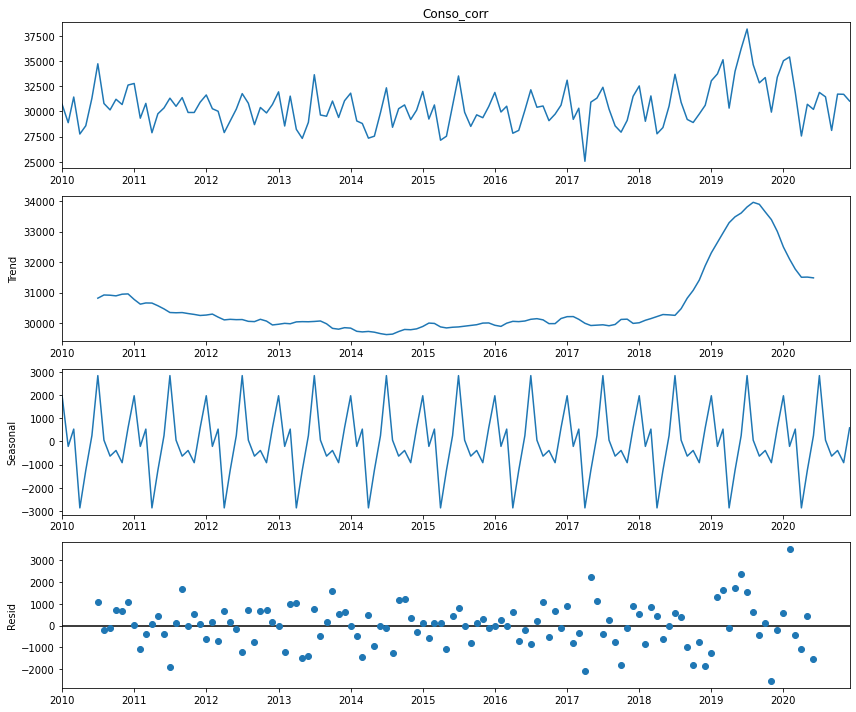

In [7]:
plt.rcParams["figure.figsize"] = (12,10)

decomp_x = seasonal_decompose(data_p9_corr['Conso_corr'],  model='additive')
decomp_x.plot()
plt.show()

In [8]:
#On fait la différence avec la saisonnalité pour obtenir une série temporelle sans l'impact saisonnier.
data_p9_corr['corr_saison'] = data_p9_corr['Conso_corr'] - decomp_x.seasonal.values
data_p9_corr.head()

,Conso_corr,corr_saison
Date,,
2010-01-01,30705.2095044,28729.0529801
2010-02-01,28881.3119936,29092.2567927
2010-03-01,31426.7237149,30891.6823431
2010-04-01,27757.7642380,30625.9634599
2010-05-01,28577.4625523,29823.4253867


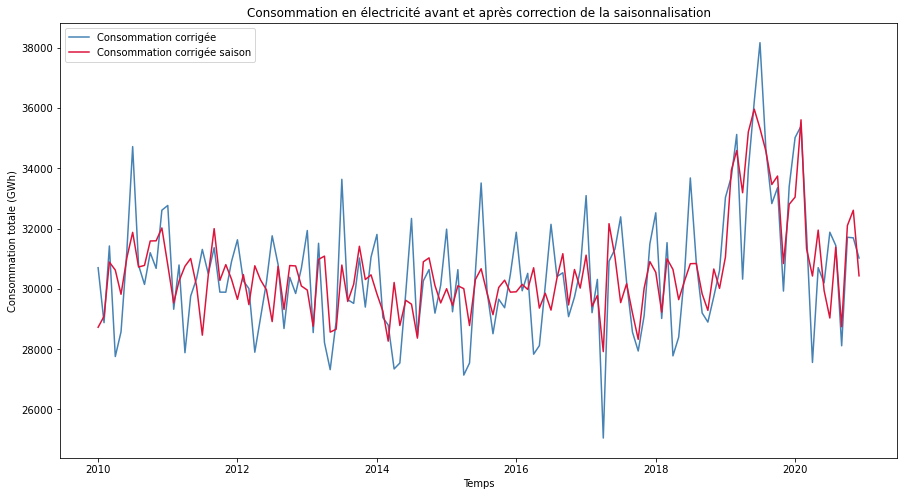

In [9]:
#Visualisation de la consommation en électricité avant et après correction de la saisonnalisation
plt.figure(figsize=(15,8))
plt.plot(data_p9_corr['Conso_corr'], label='Consommation corrigée',color="steelblue")
plt.plot(data_p9_corr['corr_saison'], label='Consommation corrigée saison',color="crimson")
plt.title('Consommation en électricité avant et après correction de la saisonnalisation')
plt.xlabel('Temps')
plt.ylabel('Consommation totale (GWh)')
plt.legend()
plt.show()

In [10]:
#Calcul de la moyenne mobile de la consommation corrigée desaisonnalisé sur 12 mois
data_p9_corr['Moyenne_mobile'] = data_p9_corr['corr_saison'].rolling(12, min_periods = 0).mean()
data_p9_corr.head(12)

,Conso_corr,corr_saison,Moyenne_mobile
Date,,,
2010-01-01,30705.2095044,28729.0529801,28729.0529801
2010-02-01,28881.3119936,29092.2567927,28910.6548864
2010-03-01,31426.7237149,30891.6823431,29570.9973720
2010-04-01,27757.7642380,30625.9634599,29834.7388940
2010-05-01,28577.4625523,29823.4253867,29832.4761925
2010-06-01,31302.7044650,31047.6825833,30035.0105910
2010-07-01,34724.2321733,31878.4747676,30298.3626162
2010-08-01,30786.0923510,30727.4193813,30351.9947118
2010-09-01,30149.8279984,30781.8313352,30399.7543367


In [11]:
#la fonction rolling recherche les données n-1, c'est pour ca qu'on a du NaN
# min_periods = 0 j'ai réduis les observations necéssaires 

In [12]:
data_p9_corr.tail()

,Conso_corr,corr_saison,Moyenne_mobile
Date,,,
2020-08-01,31445.2476648,31386.5746951,31968.1891488
2020-09-01,28114.0996980,28746.1030348,31574.8564610
2020-10-01,31715.1368318,32103.2884826,31437.8518762
2020-11-01,31696.8258053,32611.8397155,31585.1587947
2020-12-01,31025.6921337,30436.0665334,31387.5360040


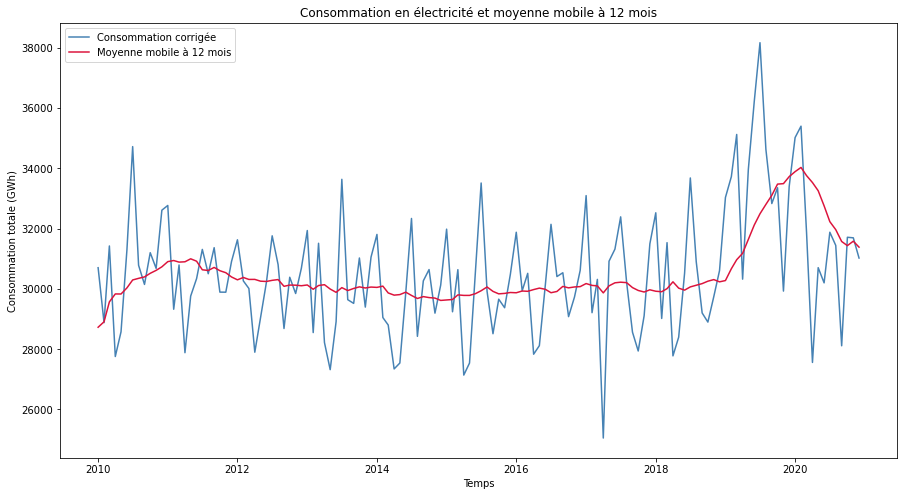

In [13]:
#Visualisation de la consommation en électricité avant et après correction de la saisonnalisation par moyenne mobile sur 12 mois
plt.figure(figsize=(15,8))
plt.plot(data_p9_corr['Conso_corr'], label='Consommation corrigée',color="steelblue")
plt.plot(data_p9_corr['Moyenne_mobile'], label='Moyenne mobile à 12 mois',color="crimson")
plt.title('Consommation en électricité et moyenne mobile à 12 mois')
plt.xlabel('Temps')
plt.ylabel('Consommation totale (GWh)')
plt.legend()
plt.show()